In [2]:

#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import Ridge,Lasso
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score , precision_score
from scipy.stats import skew

In [3]:
#Load the train data

train = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Hackathon_Will_They_Claim_It/train.csv")
train.head(20)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.000000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.000000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.880000,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.000000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.000000,36,0
5,5959,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,THAILAND,25.000000,0.000000,38,0
6,6031,EPX,Travel Agency,Online,Cancellation Plan,215,UNITED KINGDOM,59.000000,0.000000,36,0
7,8394,JZI,Airlines,Online,Basic Plan,31,VIET NAM,22.000000,7.700000,43,0
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,CHINA,48.662699,0.000000,36,1
9,8054,C2B,Airlines,Online,Bronze Plan,10,SINGAPORE,23.258824,5.817294,28,1


In [4]:
#Checking Shape of the data
print(train.shape)

(52310, 11)


In [5]:
#Checking statistical properties of data
print(train.describe())

                 ID      Duration     Net Sales  Commision (in value)  \
count  52310.000000  52310.000000  52310.000000          52310.000000   
mean    6005.745804     58.256108     48.554673             12.219963   
std     2306.450475    109.138708     60.198589             22.847645   
min     2000.000000     -2.000000   -389.000000              0.000000   
25%     4015.000000     10.000000     19.800000              0.000000   
50%     6002.000000     24.000000     29.500000              0.000000   
75%     8004.000000     57.000000     55.000000             13.380000   
max    10000.000000   4881.000000    682.000000            262.760000   

                Age         Claim  
count  52310.000000  52310.000000  
mean      39.555725      0.166699  
std       13.762473      0.372710  
min        0.000000      0.000000  
25%       33.000000      0.000000  
50%       36.000000      0.000000  
75%       43.000000      0.000000  
max      118.000000      1.000000  


In [6]:
# Checking for the class distribution of the target
print(train['Claim'].value_counts())
print(train['Claim'].value_counts(normalize=True))

0    43590
1     8720
Name: Claim, dtype: int64
0    0.833301
1    0.166699
Name: Claim, dtype: float64


Text(0, 0.5, 'Count')

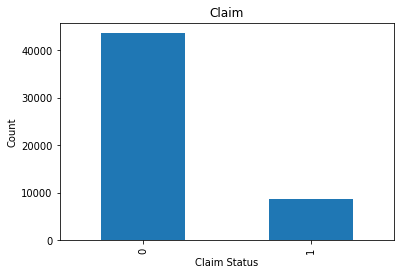

In [7]:
#Visualising target class distrubution
train['Claim'].value_counts().plot(kind='bar')
plt.title('Claim')
plt.xlabel('Claim Status')
plt.ylabel('Count')

{'whiskers': [<matplotlib.lines.Line2D at 0x1775ce36a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1775cee1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1775cee1898>],
 'medians': [<matplotlib.lines.Line2D at 0x1775cef29b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1775cef2cf8>],
 'means': []}

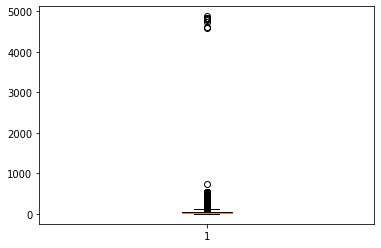

In [8]:
#Checking for outliers using boxplot for continous variable Duration

plt.boxplot(train['Duration'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1775cf59908>,
 'caps': [<matplotlib.lines.Line2D at 0x1775cf59f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1775cf59518>],
 'medians': [<matplotlib.lines.Line2D at 0x1775cf6a668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1775cf6a9b0>],
 'means': []}

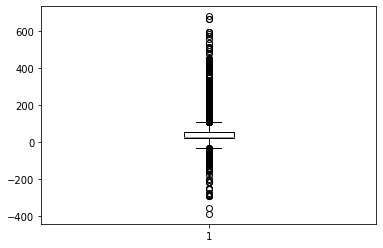

In [9]:
#Checking for outliers using boxplot for continous variable Net Sales

plt.boxplot(train['Net Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1775cf7cc18>,
 'caps': [<matplotlib.lines.Line2D at 0x1775d3a9a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1775d398f60>],
 'medians': [<matplotlib.lines.Line2D at 0x1775d3a9e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1775d3b3470>],
 'means': []}

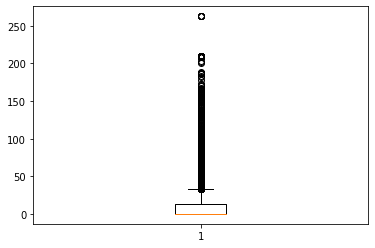

In [10]:
#Checking for outliers using boxplot for continous variable Commision (in value)

plt.boxplot(train['Commision (in value)'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1775d3ccb70>,
 'caps': [<matplotlib.lines.Line2D at 0x1775d40e908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1775d3ffe10>],
 'medians': [<matplotlib.lines.Line2D at 0x1775d40ef98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1775d40e278>],
 'means': []}

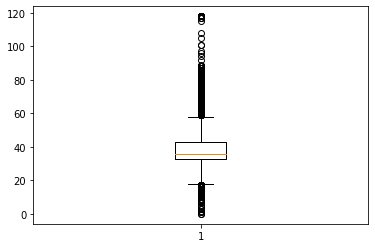

In [11]:
#Checking for outliers using boxplot for continous variable Commision (in value)

plt.boxplot(train['Age'])


                            ID  Duration  Net Sales  Commision (in value)  \
ID                    1.000000  0.000355   0.004268              0.004822   
Duration              0.000355  1.000000   0.595261              0.483148   
Net Sales             0.004268  0.595261   1.000000              0.733110   
Commision (in value)  0.004822  0.483148   0.733110              1.000000   
Age                  -0.003083 -0.003969   0.022606              0.087455   
Claim                 0.006393  0.201583   0.326799              0.258688   

                           Age     Claim  
ID                   -0.003083  0.006393  
Duration             -0.003969  0.201583  
Net Sales             0.022606  0.326799  
Commision (in value)  0.087455  0.258688  
Age                   1.000000 -0.060228  
Claim                -0.060228  1.000000  


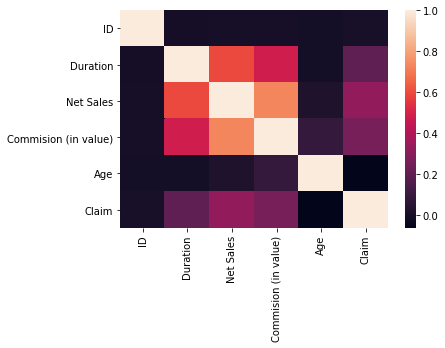

In [12]:
#Checking the correlation of train data

correlation = train.corr()
print(correlation)

# Plotting a heatmap using to check for correlation between the features
sns.heatmap(train.corr())

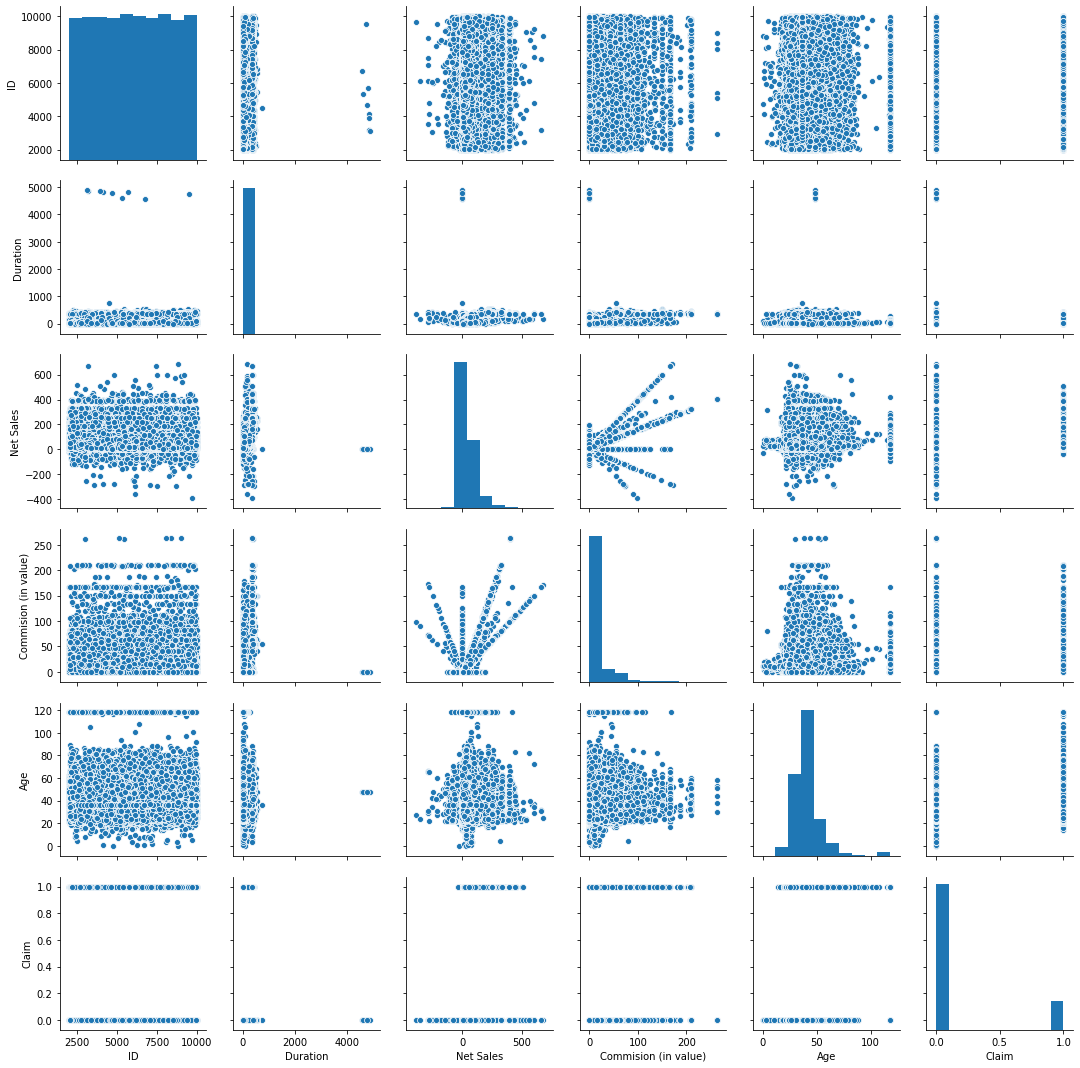

In [13]:
#Checking pairplot for feature vs feature. This will tell us which features are highly correlated 

sns.pairplot(train)

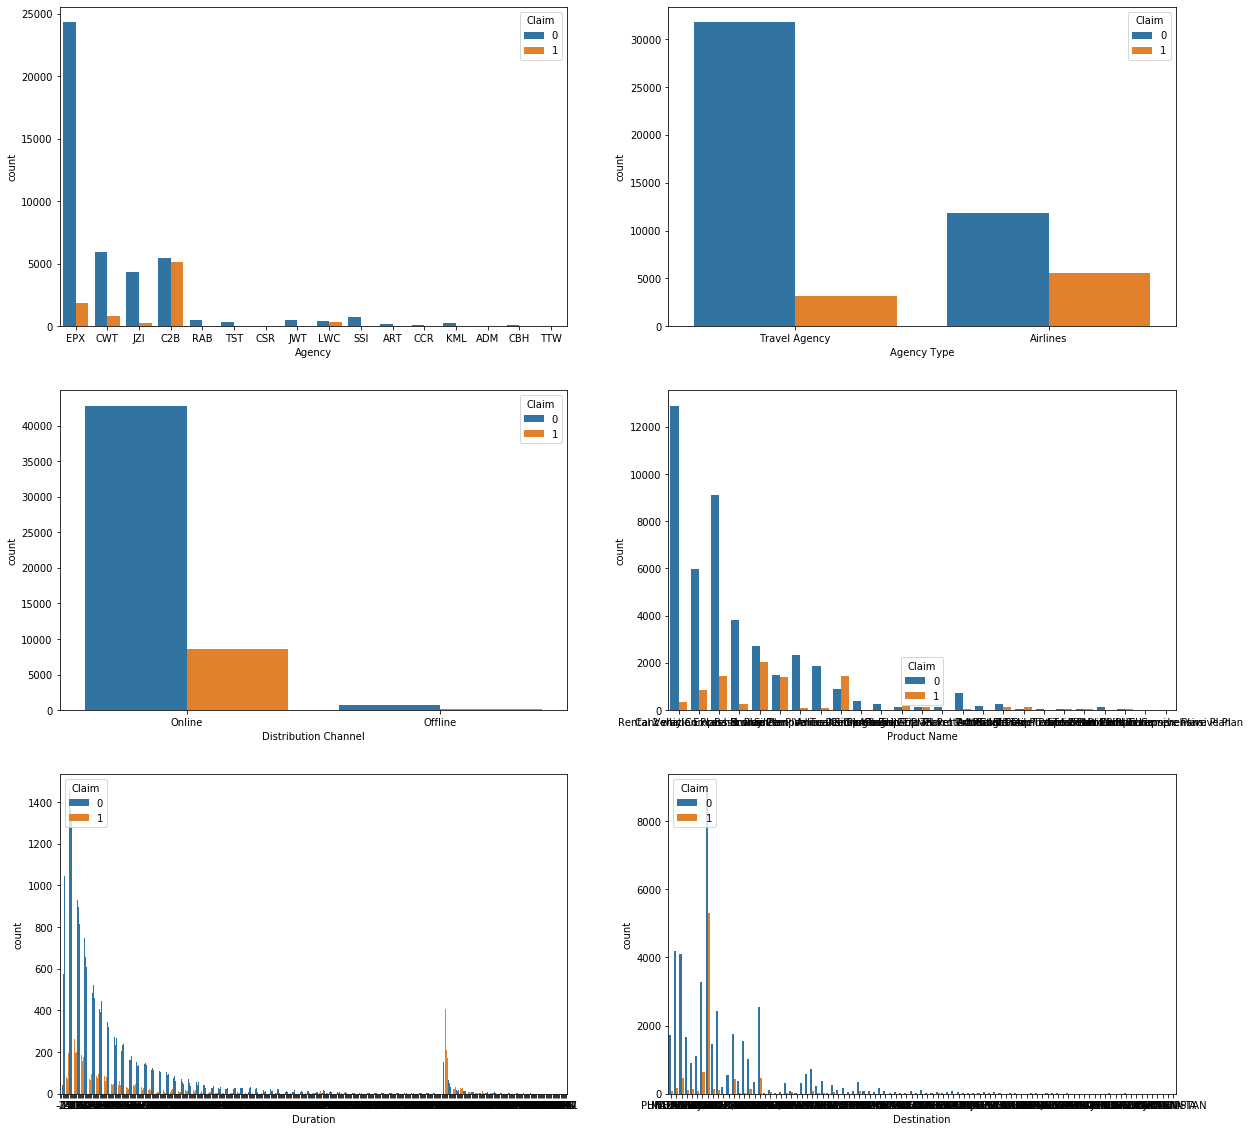

In [14]:
#Chking the bar plot for different features vs target variable

# store categorical variable
cols = ['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Age']

#creating s subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

# creating loop for plotting countplot
for i in range(0,3):
    for j in range(0,2):
        col = cols[i*2 + j]
        sns.countplot(x=train[col], hue=train['Claim'],ax = axes[i,j])


In [15]:
#checking for null values

train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

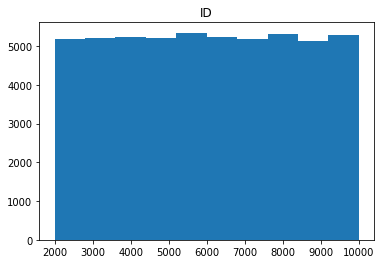

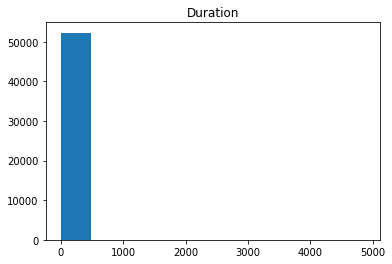

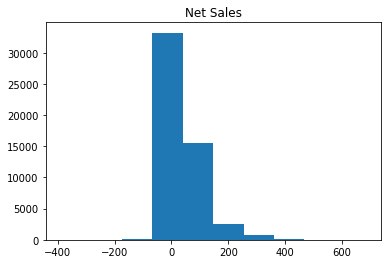

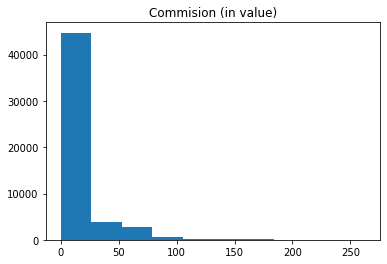

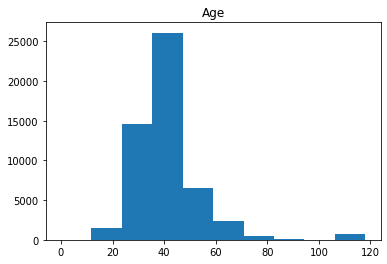

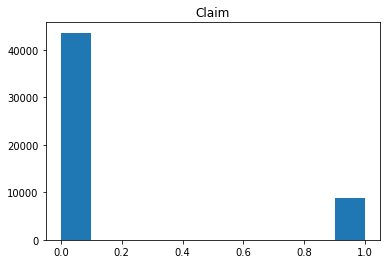

In [16]:
# Checking the distribution of the continuous features

continous_features = train._get_numeric_data().columns
for i in continous_features:
    plt.title(i)
    plt.hist(train[i])
    plt.show()

In [17]:
#Filtering data for Claim status as Yes 

Claim_Yes = train.query("Claim == 1")
Claim_Yes.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,CHINA,48.662699,0.000000,36,1
9,8054,C2B,Airlines,Online,Bronze Plan,10,SINGAPORE,23.258824,5.817294,28,1
10,3595,EPX,Travel Agency,Online,2 way Comprehensive Plan,83,CHINA,66.823793,0.000000,36,1
11,8195,C2B,Airlines,Online,Silver Plan,22,SINGAPORE,82.550000,20.640000,31,1
14,2165,C2B,Airlines,Online,Bronze Plan,17,SINGAPORE,58.211644,14.552911,66,1


In [18]:
#Filtering data for Claim status as No
Claim_No = train.query("Claim == 0")
Claim_No.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


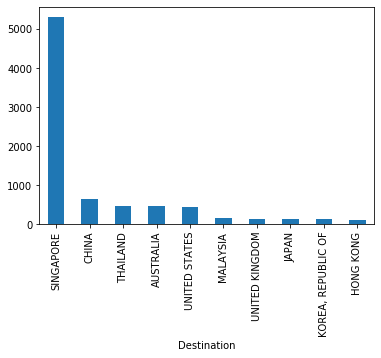

In [19]:
#Visualising top 10 destinations that had most Approved claims

Claim_Yes_Destinations = Claim_Yes.groupby('Destination')['Claim'].count()

Yes_Destinations_Most = Claim_Yes_Destinations.sort_values(ascending = False)[:10].plot(kind='bar')

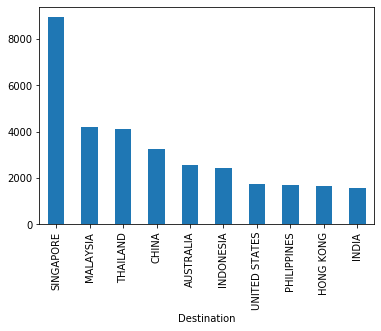

In [28]:
#Visualising top 10 destinations that had most Rejected claims

Claim_No_Destinations = Claim_No.groupby('Destination')['Claim'].count()

No_Destinations_Most = Claim_No_Destinations.sort_values(ascending = False)[:10].plot(kind='bar')


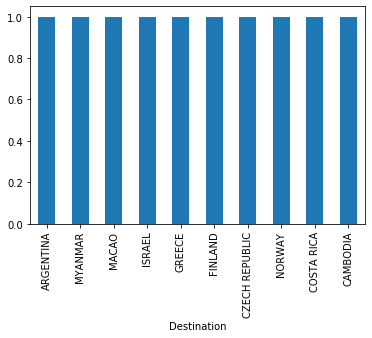

In [20]:
#Visualising top 10 destinations that had least Approved claims
Yes_Destinations_Least = Claim_Yes_Destinations.sort_values(ascending = True)[:10].plot(kind='bar')

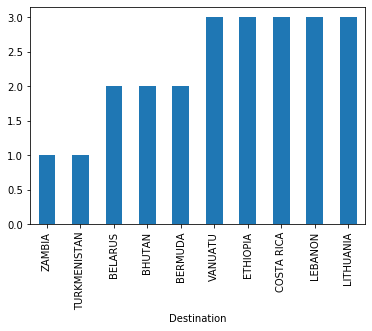

In [29]:
#Visualising top 10 destinations that had least Rejected claims
No_Destinations_Least = Claim_No_Destinations.sort_values(ascending = True)[:10].plot(kind='bar')

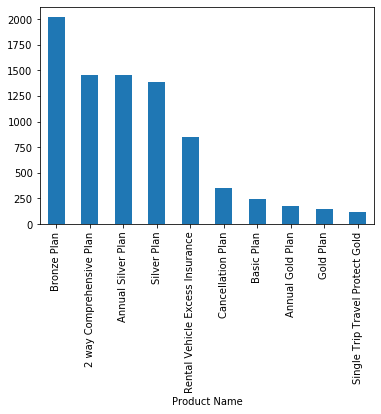

In [21]:
#Visualising top 10 products that had most Approved claims

Claim_Yes_Products = Claim_Yes.groupby('Product Name')['Claim'].count()
Yes_Products_Most = Claim_Yes_Products.sort_values(ascending = False)[:10].plot(kind='bar')

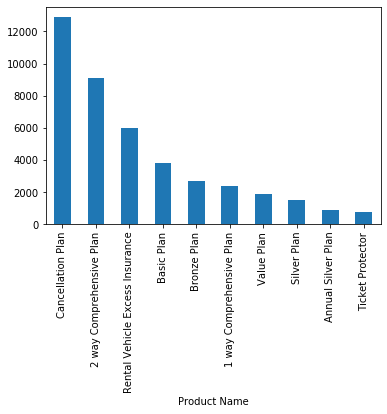

In [30]:
#Visualising top 10 products that had most Rejected claims
Claim_No_Products = Claim_No.groupby('Product Name')['Claim'].count()

No_Products_Most = Claim_No_Products.sort_values(ascending = False)[:10].plot(kind='bar')


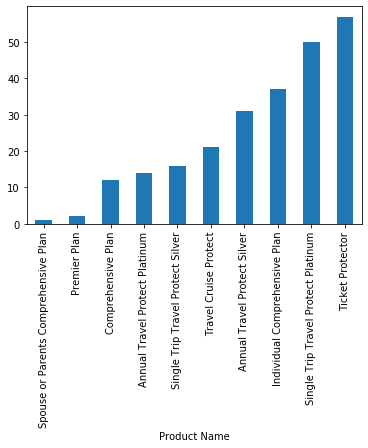

In [22]:
#Visualising top 10 products that had least Approved claims
Yes_Products_Least = Claim_Yes_Products.sort_values(ascending = True)[:10].plot(kind='bar')

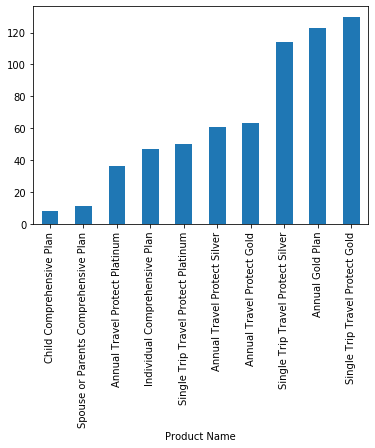

In [31]:
#Visualising top 10 products that had least Rejected claims

No_Products_Least = Claim_No_Products.sort_values(ascending = True)[:10].plot(kind='bar')


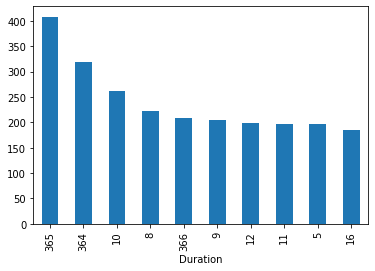

In [23]:
#Visualising top 10 Duration that had most Approved claims
Claim_Yes_Duration = Claim_Yes.groupby('Duration')['Claim'].count()
Yes_Duration_Most = Claim_Yes_Duration.sort_values(ascending = False)[:10].plot(kind='bar')

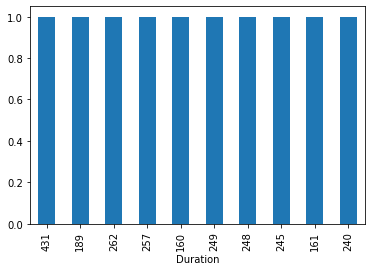

In [24]:
#Visualising top 10 Duration that had least Approved claims
Yes_Duration_Least = Claim_Yes_Duration.sort_values(ascending = True)[:10].plot(kind='bar')

In [25]:
train['Duration'].value_counts()

5       1623
6       1613
8       1548
7       1528
10      1504
4       1456
9       1455
11      1294
3       1237
12      1227
13      1109
2       1072
14      1037
16       996
15       959
19       932
17       901
18       897
20       793
21       723
22       659
23       657
365      642
27       634
25       616
24       608
26       587
1        577
28       571
34       528
        ... 
4815       1
305        1
301        1
332        1
425        1
459        1
331        1
490        1
298        1
336        1
337        1
4736       1
531        1
472        1
4609       1
547        1
311        1
342        1
740        1
4881       1
293        1
465        1
435        1
307        1
4784       1
434        1
529        1
497        1
4580       1
436        1
Name: Duration, Length: 439, dtype: int64

In [26]:
train['Age'].value_counts()

36     17979
31      2284
35      1985
48      1823
30      1371
28      1279
29      1236
32      1089
33      1069
27       997
34       994
37       943
26       933
38       868
39       834
25       735
118      729
40       729
45       712
43       709
42       701
41       696
44       667
46       658
24       626
47       591
49       541
50       508
53       507
51       499
       ...  
14        12
83        10
15         9
85         9
87         7
10         6
88         5
8          5
11         4
13         4
7          4
9          4
86         4
5          3
3          3
1          3
117        3
101        2
0          2
108        1
12         1
115        1
97         1
105        1
89         1
4          1
96         1
92         1
94         1
2          1
Name: Age, Length: 99, dtype: int64

In [44]:
# Calculating number of outliers in Duration feature
#calculate Q1,Q2,Q3 and IQR

Q1 = np.percentile(train['Duration'], 25, interpolation = 'midpoint')
Q2 = np.percentile(train['Duration'], 50, interpolation = 'midpoint')
Q3 = np.percentile(train['Duration'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3-Q1
print('Interquartile range is', IQR)

#Finding the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR

Low_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('Lower limit is:',Low_lim)
print('Upper limit is:',Up_lim)

#Data points greater than the upper limit or less than the lower limit are outliers

outlier = []
for x in train['Duration']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)
print("Number of outliers in Duration feature are:",len(outlier))

print("Percentage of Outliers in Duration feature:", len(outlier)/train['Duration'].shape[0]*100)

Q1 25 percentile of the given data is,  10.0
Q1 50 percentile of the given data is,  24.0
Q1 75 percentile of the given data is,  57.0
Interquartile range is 47.0
Lower limit is: -60.5
Upper limit is: 127.5
Number of outliers in Duration features are: 5484
Percentage of Outliers in Duration features: 10.483655132861786


In [45]:
# Calculating number of outliers in Net Sales feature
#calculate Q1,Q2,Q3 and IQR

Q1 = np.percentile(train['Net Sales'], 25, interpolation = 'midpoint')
Q2 = np.percentile(train['Net Sales'], 50, interpolation = 'midpoint')
Q3 = np.percentile(train['Net Sales'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3-Q1
print('Interquartile range is', IQR)

#Finding the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR

Low_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('Lower limit is:',Low_lim)
print('Upper limit is:',Up_lim)

#Data points greater than the upper limit or less than the lower limit are outliers

outlier = []
for x in train['Net Sales']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)
print("Number of outliers in Net Sales feature are:",len(outlier))

print("Percentage of Outliers in Net Sales feature:", len(outlier)/train['Net Sales'].shape[0]*100)

Q1 25 percentile of the given data is,  19.8
Q1 50 percentile of the given data is,  29.5
Q1 75 percentile of the given data is,  55.0
Interquartile range is 35.2
Lower limit is: -33.0
Upper limit is: 107.80000000000001
Number of outliers in Net Sales features are: 5335
Percentage of Outliers in Net Sales features: 10.198814758172434


In [46]:
# Calculating number of outliers in Commision (in value) feature
#calculate Q1,Q2,Q3 and IQR

Q1 = np.percentile(train['Commision (in value)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(train['Commision (in value)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(train['Commision (in value)'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3-Q1
print('Interquartile range is', IQR)

#Finding the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR

Low_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('Lower limit is:',Low_lim)
print('Upper limit is:',Up_lim)

#Data points greater than the upper limit or less than the lower limit are outliers

outlier = []
for x in train['Commision (in value)']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)
print("Number of outliers in Commision (in value) feature are:",len(outlier))

print("Percentage of Outliers in Commision (in value) feature:", len(outlier)/train['Commision (in value)'].shape[0]*100)

Q1 25 percentile of the given data is,  0.0
Q1 50 percentile of the given data is,  0.0
Q1 75 percentile of the given data is,  13.38
Interquartile range is 13.38
Lower limit is: -20.07
Upper limit is: 33.45
Number of outliers in Commision (in value) feature are: 6394
Percentage of Outliers in Commision (in value) feature: 12.223284266870579


In [47]:
# Calculating number of outliers in Age feature
#calculate Q1,Q2,Q3 and IQR

Q1 = np.percentile(train['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(train['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(train['Age'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3-Q1
print('Interquartile range is', IQR)

#Finding the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR

Low_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('Lower limit is:',Low_lim)
print('Upper limit is:',Up_lim)

#Data points greater than the upper limit or less than the lower limit are outliers

outlier = []
for x in train['Age']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)
print("Number of outliers in Age feature are:",len(outlier))

print("Percentage of Outliers in Age feature:", len(outlier)/train['Age'].shape[0]*100)

Q1 25 percentile of the given data is,  33.0
Q1 50 percentile of the given data is,  36.0
Q1 75 percentile of the given data is,  43.0
Interquartile range is 10.0
Lower limit is: 18.0
Upper limit is: 58.0
Number of outliers in Age feature are: 3675
Percentage of Outliers in Age feature: 7.025425348881667
